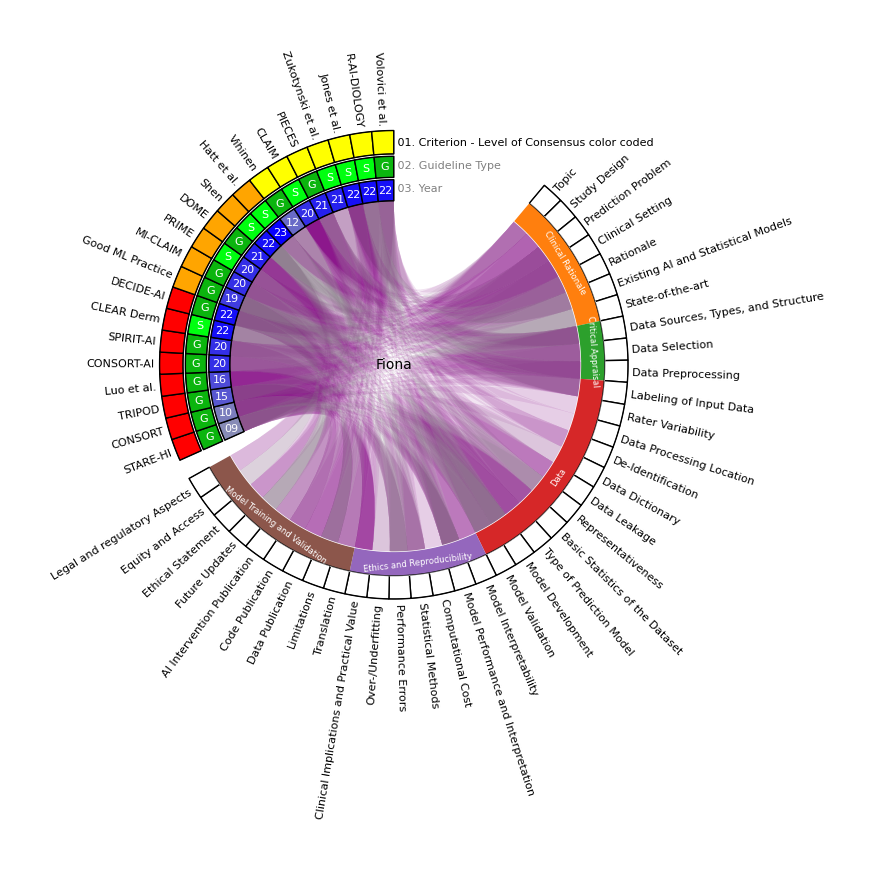

In [3]:
# read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_path = 'META-AI_ Guideline Items - Tabellenblatt.csv'
core_data = 'core data.csv'
import csv

# read csv with pandas
df = pd.read_csv(csv_path, sep=',', header=0, index_col=0)
#get the first row
first_row = df.iloc[0]
# get the first column
first_column = df.iloc[:,0]
high_critirian_names = df.columns.values[4:12]
medium_critirian_names = df.columns.values[15:21]

low_critirian_names = df.columns.values[24:31]
all_critirian_names = np.concatenate((high_critirian_names, medium_critirian_names, low_critirian_names))

#print(all_critirian_names)
all_critirian_names = all_critirian_names
item_names = first_column.values
# remove nan from list
item_names = [x for x in item_names if str(x) != 'nan']
#print(item_names)
#print(first_row.keys())
sectors = {"Guideline Item": len(item_names), "Critirian": len(all_critirian_names)}
dict = {"Guideline Item": (item_names), "Critirian": (all_critirian_names)}
from pycirclize import Circos
from pycirclize.utils import ColorCycler
circos = Circos(sectors, space=5, start=40, end=360, endspace=False)
guide_line_group = {'Clinical Rationale': 7, 'Data': 11, 'Model Training and Validation': 9, 'Critical Appraisal': 3, 'Ethics and Reproducibility': 7}
df_core_data = pd.read_csv(core_data, sep=',', header=0, index_col=0, encoding='utf-8', engine='python', error_bad_lines=False)
first_column_core = df_core_data.iloc[:,0]
cata_count = df_core_data.groupby('cata')['test'].count()


##########################
sector = circos.sectors[0]
#print(sector.name)
track1 = sector.add_track((90, 100))
track1.axis()
#print(int(track1.size))

pos_list = list(range(0, int(track1.size)))
# add 0.5 to all positions
pos_list = [x + 0.5 for x in pos_list]
#print(len(pos_list))
# Plot rect & text (style1)
for i in range(int(track1.size)):
    start, end = i, i + 1
    track1.rect(start, end, fc='white', ec="black", lw=1)
track1.xticks(
    pos_list,
    dict[sector.name],
    outer=True,
    tick_length=0,
    label_margin=2,
    label_orientation="vertical",
)
# Plot rect & text (style2)
track2 = sector.add_track((80, 90))
for i in range(int(track2.size)):
    start, end = i, i + 1
    track2.rect(start, end, fc=ColorCycler(), ec="white", lw=1)
# track2.yticks('Groups of Items', tick_length=0, label_margin=2)
count = 0
first_column_core_enu = enumerate(first_column_core)
#print('----------')
for key,value in cata_count.items():
    #print(value)
    end = count + value
    track2.rect(count, end, fc=ColorCycler())
    track2.text(str(key), (count + end) / 2, color="white", adjust_rotation=True, **{'size':6, 'va':"center"})
    count = end

##################
sector = circos.sectors[1]
#print(sector.name)
track1 = sector.add_track((90, 100))
track1.axis()
#print(int(track1.size))

pos_list = list(range(0, int(track1.size)))
# add 0.5 to all positions
pos_list = [x + 0.5 for x in pos_list]
#print(len(pos_list))
# Plot rect & text (style1)

track1.xticks(
    pos_list,
    dict[sector.name],
    outer=True,
    tick_length=0,
    label_margin=2,
    label_orientation="vertical",
)
for i in range(8):
    start, end = i, i + 1
    track1.rect(start, end, fc='red', ec="black", lw=1)
for i in range(6):
    start, end = i, i + 1
    track1.rect(start+8, end+8, fc='orange', ec="black", lw=1)
for i in range(7):
    start, end = i, i + 1
    track1.rect(start+14, end+14, fc='yellow', ec="black", lw=1)
# Plot rect & text (style2)
track2 = sector.add_track((80, 89))
track2.axis()
guideline_list = ['G','G','G','G','G','G','S','G','G','G','S','G','S','S','G','S','G','S','S','S','G']
for i in (range(0, int(track1.size))):
    start, end = i, i + 1
    if guideline_list[i] == 'G':
        color = '#0bb50e'
    else:
        color = '#00ff10'
    track2.rect(start, end, fc=color, ec="black", lw=1)
    track2.text(str(guideline_list[i]), (end + start) / 2, size=8, color="white", adjust_rotation=False)
track3 = sector.add_track((70, 79))
year = [2009,2010,2015,2016,2020,2020,2022,2022,2019,2020,2020,2021,2022,2023,2012,2020,2021,2021,2022,2022,2022]
year_gradient_color_dict = {'2009': '#878bb6', '2010': '#7b7dbd', '2012': '#696ac7','2015': '#5857d1', '2016': '#4e4bd7','2019': '#403cdf', '2020': '#342fe6', '2021': '#2620ee','2022': '#160ff7', '2023': '#0800ff'}

track3.axis()
for i in (range(0, int(track1.size))):
    start, end = i, i + 1
    track3.rect(start, end, fc=year_gradient_color_dict[str(year[i])], ec="black", lw=1)
    track3.text(str(year[i])[2:], (end + start) / 2, size=8, color="white",adjust_rotation=False)

    #########

critirian_link_list = enumerate(all_critirian_names)
# transfer item_names from numpy array to list
item_names_list = enumerate(item_names)

# get row and column number of the dataframe when the value is Y
tuple_listY = []
tuple_listP = []
for cri in range(len(all_critirian_names)):
    #print(cri)
    for item in range(len(item_names)):
        #print(item)
        if df_core_data.iloc[item, cri+4] == "Y":
            #print(item, cri)
            tuple_listY.append((item, cri))
        if df_core_data.iloc[item, cri+4] == "P":
            #print(item, cri)
            tuple_listP.append((item, cri))

for i in range(len(tuple_listY)):
    #print(("Guideline Item", tuple_listY[i][0], tuple_listY[i][0]+1), ("Critirian", tuple_listY[i][1], tuple_listY[i][1]+1))
    circos.link(("Guideline Item", tuple_listY[i][0], tuple_listY[i][0]+1), ("Critirian", tuple_listY[i][1], tuple_listY[i][1]+1),alpha=0.1, color="purple")
for i in range(len(tuple_listP)):
    circos.link(("Guideline Item", tuple_listP[i][0], tuple_listP[i][0]+1), ("Critirian", tuple_listP[i][1], tuple_listP[i][1]+1),alpha=0.1)


text_common_kws = {'ha':"left", 'va':"center", 'size':8}
circos.text(" 01. Criterion - Level of Consensus color coded", r=95, color="black", **text_common_kws)
circos.text(" 02. Guideline Type", r=85, color="grey", **text_common_kws)
circos.text(" 03. Year", r=75, color="grey", **text_common_kws)
circos.text("Fiona", r=0, ha="center", va="center", color="black")

fig = circos.plotfig()
fig.show()